In [1]:
!pip install graphviz
## 노트북 포맷으로 graphviz 다시 깔고 해보기
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#의사결정나무 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터 로딩, 학습/데스트 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size = 0.2, random_state = 11)

# 학습
dt_clf.fit(X_train, y_train)

#export_graphviz()를 후출하면 out_file로 지정된 tree.dot파일을 생성
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris.target_names,\
               feature_names = iris.feature_names, impurity = True, filled = True)

# tree.dot파일을 grqphviz가 읽어서 주노상에 시각화
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [2]:
import seaborn as sns
import numpy as np
import matplotlib
%matplotlib inline

iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Feature importance : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


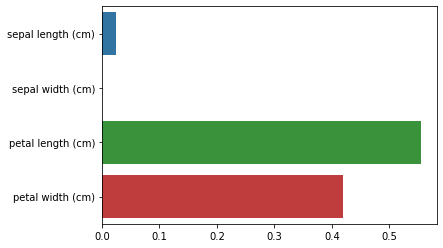

In [3]:
#feature importance 추출
print("Feature importance : \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

#피처 별 중요도 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_) :
    print('{0} : {1:.3f}'.format(name, value))
    
#피처 중요도를 칼럼 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y = iris.feature_names)

[[ 0.12041909 -1.68941375]
 [ 1.09665605  1.79445113]
 [ 0.88426577  1.43370121]
 [ 0.95048011 -0.56202253]
 [ 1.04421447  0.02899023]
 [ 0.50102164 -1.27508231]
 [ 1.10447379  0.35117341]
 [-2.5077599   2.48857017]
 [-0.00811816  0.11564734]
 [ 0.31338067 -0.87926516]
 [-0.04687748  1.35489986]
 [ 1.20888898  0.64232637]
 [ 1.71173001 -1.04637674]
 [ 1.29670808 -0.6054158 ]
 [ 1.24188996 -0.3819388 ]
 [-1.78273822  1.52817583]
 [-1.50514147  1.27186707]
 [ 0.87163989 -0.42276158]
 [ 2.53026908 -1.61974843]
 [ 0.95000368  1.83240861]
 [-1.53716448 -0.89497353]
 [-2.13650855  2.73389996]
 [ 1.01037788  0.59402713]
 [ 1.9876467  -0.22375521]
 [ 1.12463497  2.13646176]
 [-0.65122279  0.97865617]
 [ 0.85144036  0.42548085]
 [-0.10789457 -0.65942376]
 [-0.41699944 -2.10727211]
 [-0.77993003  1.17281753]
 [ 2.34137626 -0.52950108]
 [ 0.79625824 -0.28978825]
 [ 1.3641878   1.35329628]
 [ 0.04699455 -1.13830278]
 [ 0.77274433  0.72303297]
 [-1.20971021  1.38961257]
 [-1.63281739  2.47584639]
 

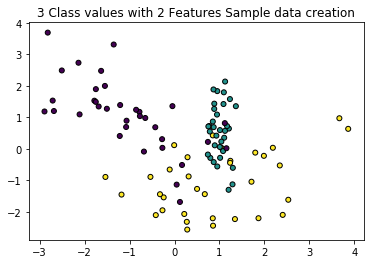

In [4]:
## 결정트리 과적합
from sklearn.datasets import make_classification ## 분류를 위한 테스트용 데이터를 쉽게 만들 수 있는 메서드
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서는 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, ### 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수
                                          n_classes = 3, n_clusters_per_class =1, random_state = 0) ### 클래스 당 클러스터의 수
print(X_features)
print("==========")
print(y_labels)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c=y_labels, s = 25, edgecolors='k')

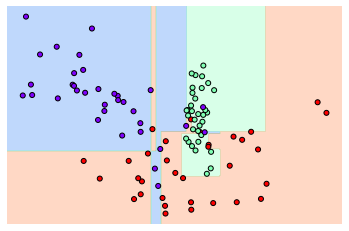

In [5]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
# 이상치 데이터까지 분류하기 위하여 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다
# 결정 트리의 기본 하이퍼 파라미터 설정은 리프노드 안에 데이터가 모두 균일하거나 하나만 존재해야하는 엄격한 분할 기준으로 인해
# 결정 기준 경계가 많이지고 복잡해졌다

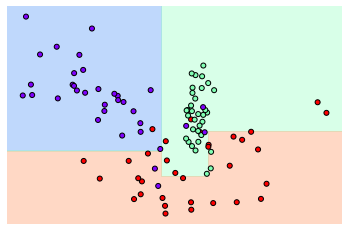

In [6]:
# min_sample_leaf = 6으로 결정 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
# 이상치에 크게 반응하지 않으며 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있다 
# 위 분류 기준보다 요 분류 기준에 따른 모델이 성능이 뛰어날 가능성이 높다ㅏ 
# -> 학습 데이터 세트에만 지나치게 최적화되면 오히려 테스트 데이터 세트에서의 정확도를 떨어뜨린다

In [7]:
import pandas as pd

# 사용자 행동 데이터 세트에 대한 예측 분류

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음, 이를 데이터프레임으로 로드
feature_name_df = pd.read_csv("./features.txt", sep = '\s+',
                             header = None, names = ['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print("전체 피처명에서 10개만 추출 : ", feature_name[:10])


전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [8]:
feature_dup_df = feature_name_df.groupby('column_name').count() ## 모든 컬럼명을 
print(feature_dup_df[feature_dup_df['column_index']>1].count()) ## 같은 컬럼명이 1개초과(중복)된 수 : 42개 중복 
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [9]:
# 중복된 피처명에 대해서 _1, _2를 부여하는 함수 생성
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [10]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
#     new_feature_name_df_list = new_feature_name_df['column_name'].tolist()
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()
# dt_data_train = X_train.iloc[:, :].values
# dt_data_test = X_test.iloc[:, :].values
# dt_data = str(np.concatenate((dt_data_train, dt_data_test), axis = 0))

In [11]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info()) ## 모든 피처가 infloat이므로 별도의 인코딩 노필요

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [12]:
print(y_train['action'].value_counts()) ## 레이블값별 레코드 개수
# dt_labels = y_train['action'].tolist() + y_test['action'].tolist()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [13]:
# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy)) ########## 85

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n ', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [14]:
## 위는 모든 파라미터가 디폴트였다
## 이제는 결정 트리의 깊이를 설정하여 이 파라미터가 주는 영향을 알아보자

params = {'max_depth' : [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.2min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8526
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8}


In [15]:
# GridSearchCV 객체의 cv_results_속성을 데이터프레임으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']] # 하나의 최대깊이에 cv = 5, 이에 대한 평균

,param_max_depth,mean_test_score
0,6,0.850925
1,8,0.852557
2,10,0.850925
3,12,0.844124
4,16,0.852149
5,20,0.851605
6,24,0.850245


In [16]:
## 이제 test 데이터로 결정트리의 최대깊이의 변화에 따른 값을 측정
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy)) ## 8 -> 87, 이후 감소

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [17]:
 ## 요번엔 최대깊이와 최소샘플사이즈를 같이 변경하면서 성능을 튜닝해보자
params = {'max_depth' : [8,12,16,20],
         'min_samples_split' : [16,24],
         }
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 초l고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이터 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.7min finished


GridSearchCV 초l고 평균 정확도 수치 : 0.8550
GridSearchCV 최적 하이터 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [18]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


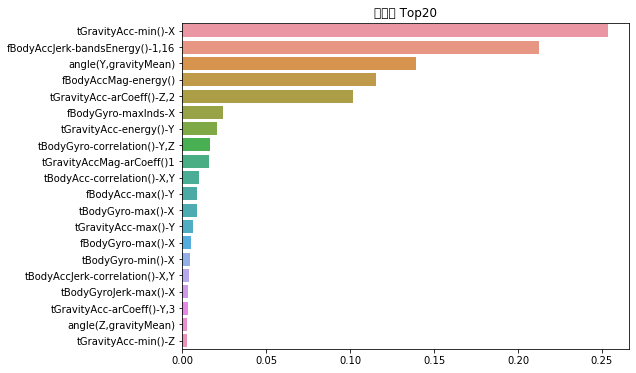

In [19]:
# import numpy as np
ftr_importances_values = best_df_clf.feature_importances_
#### Top중요도로 정렬, sns의 막대그래프로 쉽게 표현하기 위해 Series로 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('중요도 Top20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [20]:
# dt_clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 16,random_state = 156)

# X_train, X_test, y_train, y_test = train_test_split(dt_data,dt_labels, test_size = 0.2, random_state = 11)

# dt_clf.fit(X_train, y_train)

# export_graphviz(dt_clf, out_file = "tree.dot", class_names = y_labels,\
#                feature_names = feature_name, impurity = True, filled = True)

# with open("tree.dot") as f :
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

In [21]:
## 앙상블

from sklearn.ensemble import VotingClassifier ## 보팅방식의 앙상블을 구현하기 위한 클래스
from sklearn.linear_model import LogisticRegression ## 사용 알고리즘1
from sklearn.neighbors import KNeighborsClassifier ## 사용 알고리즘2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [22]:
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# 보팅
# 개별 모델은 로지스틱 회귀와 KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [24]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators= [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')

In [25]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

In [26]:
# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                 

In [27]:
pred = vo_clf.predict(X_test)

In [28]:
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9561


In [29]:
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


In [30]:
## 랜덤포레스트(배깅)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [31]:
# 결정트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 데이터프레임 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능평가
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy)) # 랜덤 포레스트는 사용자 행동 인식 데이터 세트에 대해 약 91퍼의 정확도를 보여줌

랜덤 포레스트 정확도 : 0.9108


In [32]:
## 트리 기반의 앙상블 알고리즘의 단점을 구ㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㅜㄷ이 뽑자면 너무 많은 하이퍼 파라미터, 튜닝을 위한 시간 소모
## 많은 시간을 소모하여 결과를 얻어도 예측 성능이 향상되는 경우는 그닥 많지 않다
## 트리기반 자체가 하이퍼 파라미터가 많은데 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터가 추가되기 때문
## 그나마 랜덤포레스트가 결정트리에 사용되는 하이퍼파라미터와 같은 파라미터가 대부분

In [33]:
## GridSearchCV를 이용한 랜덤 포레스트의 하이퍼 파라미터 튜닝
params = {
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' :[8,12,18],
    'min_samples_split' : [8,16,20]
}

# 객체 생성 후 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9166


In [34]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                min_samples_split=8, random_state = 0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9165


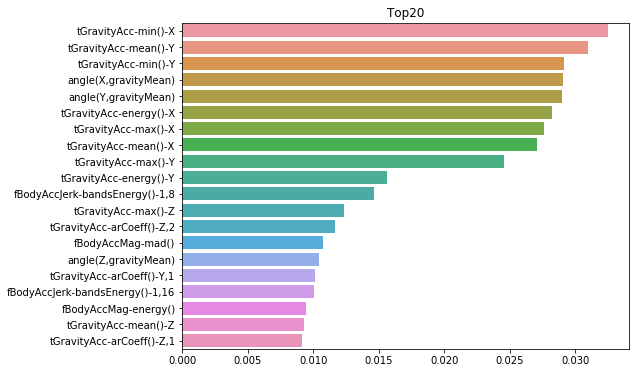

In [35]:
## 피처별 중요도를 막대그래프를 이용해서 표현해보자
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [36]:
## GBM 

from sklearn.ensemble import GradientBoostingClassifier
import time ## 학습시간이 얼마나 걸리는지 출력해보자

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간ㅇ 측정을 위해 시작시간 설정
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)

gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.4f}'.format(time.time()-start_time))

GBM 정확도 : 0.9386
GBM 수행 시간 : 261.7891


In [ ]:
## GridSearchCV를 통한 하이퍼 파라미터 최적화
params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1] ## learning rate가 높을 수록 빠르게 모델의 bias를 줄여나가지만, learning rate가 적으면 디테일한 부분을 놓칠 수 있다고 이해하시면 됩니다.
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 25.9min finished


In [ ]:
# 최적으로 학습된 estimator로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))